In [460]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Statement

Principal Component Analysis

In [461]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Q1. Load the Data file into Python DataFrame and view top 10 rows

In [462]:
pd_cancer=pd.read_csv('breast-cancer-wisconsin-data.csv')
pd_cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [463]:
pd_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [464]:
print ('Bare nuclei is object so first convert to integer')

Bare nuclei is object so first convert to integer


In [465]:
pd_cancer.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


The column bare nuclei is missing so it must be having some incorrect data. So, Lets find and eliminate/replace that data.

In [467]:
pd_cancer.shape

(699, 11)

## Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [468]:
print(pd_cancer.isna().sum())
print('so no missing values')

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64
so no missing values


In [469]:
pd_cancer[pd_cancer=='?'].sum()

ID                             0.0
ClumpThickness                 0.0
Cell Size                      0.0
Cell Shape                     0.0
Marginal Adhesion              0.0
Single Epithelial Cell Size    0.0
Normal Nucleoli                0.0
Bland Chromatin                0.0
Mitoses                        0.0
Class                          0.0
dtype: float64

So out of 11 column 10 are showing no sign of '?'. Only column name Bare Nuclei is not shown that means it has got '?'. 

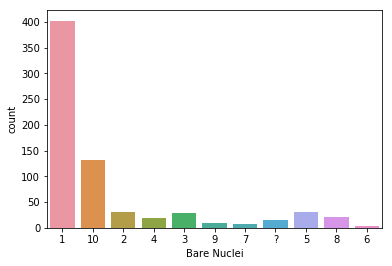

In [470]:
sns.countplot(pd_cancer['Bare Nuclei'])

In [471]:
pd_cancer['Bare Nuclei'] =pd_cancer['Bare Nuclei'].replace('?', '1')
pd_cancer['Bare Nuclei']

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      1
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

In [472]:
pd_cancer['Bare Nuclei']=pd.to_numeric(pd_cancer['Bare Nuclei'])

In [473]:
pd_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


## Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [474]:
pd_cancer.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


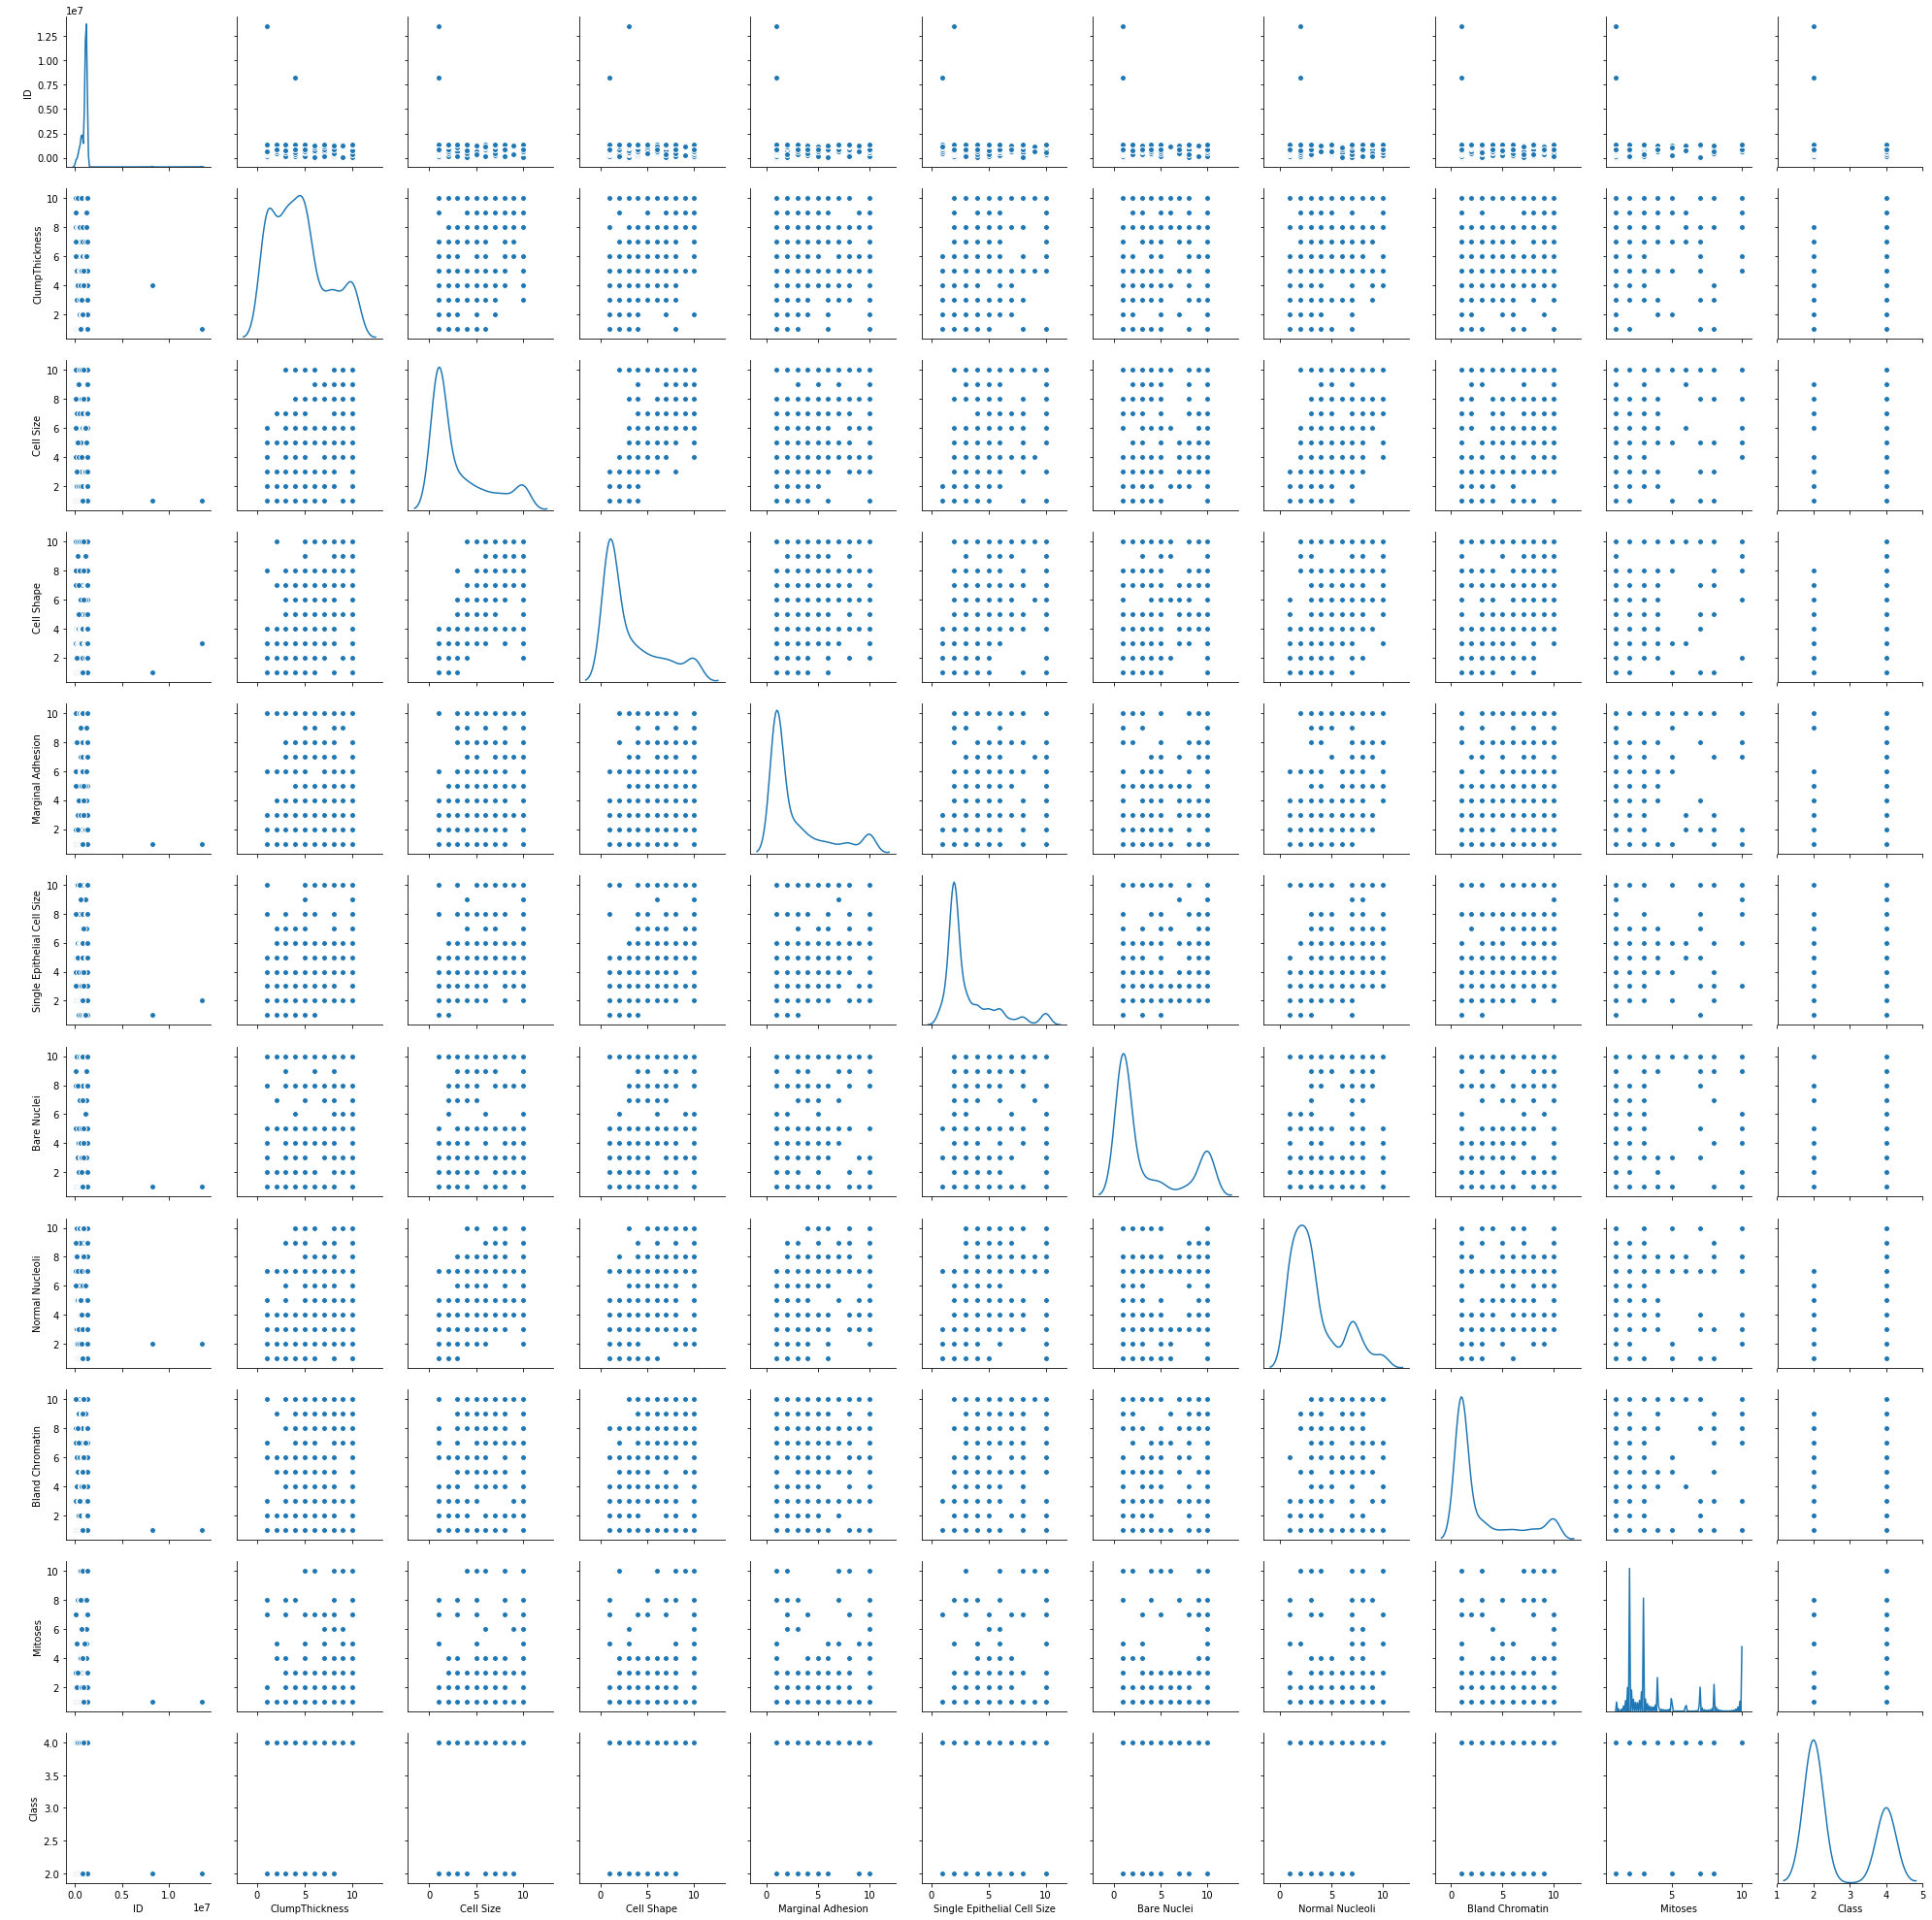

In [475]:
sns.pairplot(pd_cancer,diag_kind='kde')

## Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [476]:
pd_cancer=pd_cancer.drop('ID', axis=1)

In [477]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x=pd_cancer.iloc[:,0:-1]
y=pd_cancer['Class']
x = scaler.fit_transform(x)

In [478]:
X_train, X_test_O, y_train, y_test_O = train_test_split(x, y, test_size=0.3, random_state=1)

## Q6 Create a covariance matrix for identifying Principal components

In [479]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[0.09481276 0.06936544 0.06902668 0.04965448 0.0411445  0.07427936
  0.04458878 0.05898839 0.01978536]
 [0.06936544 0.11499436 0.10099496 0.0751453  0.06050755 0.09213055
  0.0675244  0.08244137 0.02540841]
 [0.06902668 0.10099496 0.10815765 0.0707238  0.05669792 0.09285603
  0.06287407 0.07794025 0.02378661]
 [0.04965448 0.0751453  0.0707238  0.0974378  0.04313041 0.08228461
  0.05293258 0.06314154 0.02187112]
 [0.0411445  0.06050755 0.05669792 0.04313041 0.05983157 0.05736458
  0.03764658 0.05045426 0.01938353]
 [0.07427936 0.09213055 0.09285603 0.08228461 0.05736458 0.162416
  0.07203255 0.07839609 0.02494129]
 [0.04458878 0.0675244  0.06287407 0.05293258 0.03764658 0.07203255
  0.06985227 0.05924309 0.01206703]
 [0.05898839 0.08244137 0.07794025 0.06314154 0.05045426 0.07839609
  0.05924309 0.11724236 0.02236032]
 [0.01978536 0.02540841 0.02378661 0.02187112 0.01938353 0.02494129
  0.01206703 0.02236032 0.02874388]]


## Q7 Identify eigen values and eigen vector

In [480]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30541209 -0.04409464 -0.81889212  0.09260813  0.40307265  0.19137562
   0.02053781 -0.15802654 -0.03364779]
 [-0.40732765 -0.24014134 -0.02312865 -0.32134192 -0.29519503  0.08080608
   0.72825689  0.21464047  0.05022354]
 [-0.39345645 -0.15825694 -0.10730831 -0.27405191 -0.30283013  0.07535029
  -0.65508437  0.44917279 -0.07246899]
 [-0.32751486  0.10021382  0.44137421 -0.43689907  0.67331943  0.10807033
  -0.03895347 -0.06011708 -0.16379721]
 [-0.24596501 -0.14380364 -0.03739747 -0.14991933 -0.2258996  -0.5859644
  -0.07775455 -0.59452268 -0.37557884]
 [-0.44391029  0.80232931  0.03309358  0.30046977 -0.12942146 -0.1601495
   0.07867731  0.13312553 -0.03903529]
 [-0.28353973  0.00559903  0.19142154  0.05637123 -0.26177974  0.5110528
  -0.14966913 -0.57520234  0.44361219]
 [-0.35945519 -0.48687501  0.28501143  0.70313437  0.17130388 -0.07453533
   0.00269494  0.12972158 -0.07987334]
 [-0.10759063 -0.06171946 -0.04676557 -0.10883159  0.1991808  -0.55114088
  -0.06

In [481]:
#Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(0.588390498860129, array([-0.30541209, -0.40732765, -0.39345645, -0.32751486, -0.24596501,
       -0.44391029, -0.28353973, -0.35945519, -0.10759063])), (0.0634502606135296, array([-0.04409464, -0.24014134, -0.15825694,  0.10021382, -0.14380364,
        0.80232931,  0.00559903, -0.48687501, -0.06171946])), (0.048107512804521954, array([-0.81889212, -0.02312865, -0.10730831,  0.44137421, -0.03739747,
        0.03309358,  0.19142154,  0.28501143, -0.04676557])), (0.04175531123678957, array([ 0.09260813, -0.32134192, -0.27405191, -0.43689907, -0.14991933,
        0.30046977,  0.05637123,  0.70313437, -0.10883159])), (0.03407713015805009, array([ 0.40307265, -0.29519503, -0.30283013,  0.67331943, -0.2258996 ,
       -0.12942146, -0.26177974,  0.17130388,  0.1991808 ])), (0.030298114221628272, array([ 0.19137562,  0.08080608,  0.07535029,  0.10807033, -0.5859644 ,
       -0.1601495 ,  0.5110528 , -0.07453533, -0.55114088])), (0.02077675959192928, array([-0.15802654,  0.21464047,  0.449172

##  Q8 Find variance and cumulative variance by each eigen vector

In [482]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)] 
print ('Varience of eigen vector:',var_explained)

Varience of eigen vector: [0.689394637349968, 0.07434224293248407, 0.05636573229501839, 0.04892310073545989, 0.03992686971109847, 0.0354991413129066, 0.02434333435351831, 0.019700172284153637, 0.011504769025392582]


In [483]:

cum_var_exp = np.cumsum(var_explained)
print('Cummulative varience',cum_var_exp)

Cummulative varience [0.68939464 0.76373688 0.82010261 0.86902571 0.90895258 0.94445172
 0.96879506 0.98849523 1.        ]


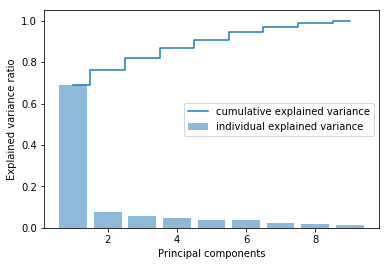

In [484]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

## Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [485]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8).fit(pd_cancer)
pca


PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [493]:
pca.components_

array([[ 0.29640365,  0.40116211,  0.38915022,  0.32876671,  0.247934  ,
         0.43687386,  0.28990407,  0.3537152 ,  0.12261394,  0.12314774],
       [-0.06595775,  0.22870068,  0.16628487, -0.09346431,  0.18610509,
        -0.7828079 ,  0.01692239,  0.48047291,  0.16314973, -0.04216161],
       [-0.84584065, -0.02503428, -0.07429911,  0.48623073,  0.04908514,
         0.09251165,  0.10913312,  0.12910353,  0.03468396, -0.03518092],
       [ 0.06979026,  0.28514218,  0.1989667 ,  0.39909668,  0.19964132,
        -0.30395324, -0.04642332, -0.74464267,  0.15944574, -0.02534468],
       [-0.41019745,  0.34616662,  0.38203475, -0.63392553,  0.19357351,
         0.16437252,  0.080591  , -0.21118963, -0.22010471,  0.00797017],
       [-0.07682591, -0.09414636, -0.0943343 , -0.18871573,  0.40561146,
         0.23061371, -0.47378659,  0.02571322,  0.70560486, -0.00227668],
       [-0.02575375,  0.17493294,  0.34046254,  0.19186468, -0.27870558,
         0.05424445, -0.79613087,  0.15143879

## Q10 Find correlation between components and features

In [487]:
pd.DataFrame(pca.components_,columns=list(pd_cancer))

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,0.296404,0.401162,0.389150,0.328767,0.247934,0.436874,0.289904,0.353715,0.122614,0.123148
1,-0.065958,0.228701,0.166285,-0.093464,0.186105,-0.782808,0.016922,0.480473,0.163150,-0.042162
2,-0.845841,-0.025034,-0.074299,0.486231,0.049085,0.092512,0.109133,0.129104,0.034684,-0.035181
3,0.069790,0.285142,0.198967,0.399097,0.199641,-0.303953,-0.046423,-0.744643,0.159446,-0.025345
4,-0.410197,0.346167,0.382035,-0.633926,0.193574,0.164373,0.080591,-0.211190,-0.220105,0.007970
5,-0.076826,-0.094146,-0.094334,-0.188716,0.405611,0.230614,-0.473787,0.025713,0.705605,-0.002277
6,-0.025754,0.174933,0.340463,0.191865,-0.278706,0.054244,-0.796131,0.151439,-0.280267,-0.009014
7,0.091975,-0.125354,-0.241205,0.106079,0.753945,-0.015041,-0.167907,0.053367,-0.553776,-0.005205


So, from above we can see the weighted contribution of each original independent variable into 0-7 PC's 

   ## SVM

## Q1 Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [488]:
df_pima=pd.read_csv('pima-indians-diabetes.csv')

In [489]:
df_pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [490]:
# Eye ball the imported dataset
df_pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [491]:
df_pima.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

### Check dimension of dataset

In [492]:
df_pima.shape

(768, 9)

## Q2 Check distribution of dependent variable, Outcome and plot it (1 Marks)

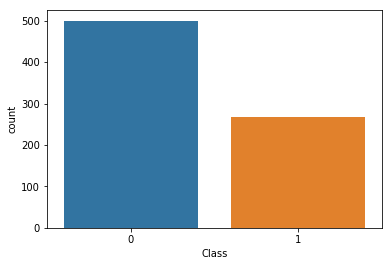

In [446]:
sns.countplot(x='Class',data=df_pima)

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [447]:
# Check data types and info of dataset
df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Q3 Check data distribution using summary statistics and provide your findings

In [448]:
df_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are no missing data since the count of each attribute is same. On an average 34% people get diabetes but the standard deviation is more i.e 47% so chances of having diabetes is 34+47% or 34-47%.  

## Q4 Do correlation analysis and bivariate viualization with Insights(1 Marks)

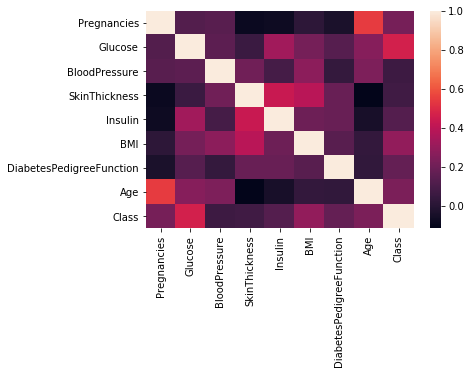

In [449]:
sns.heatmap(df_pima.corr())

Pregnancy and age is having nice correlation. 

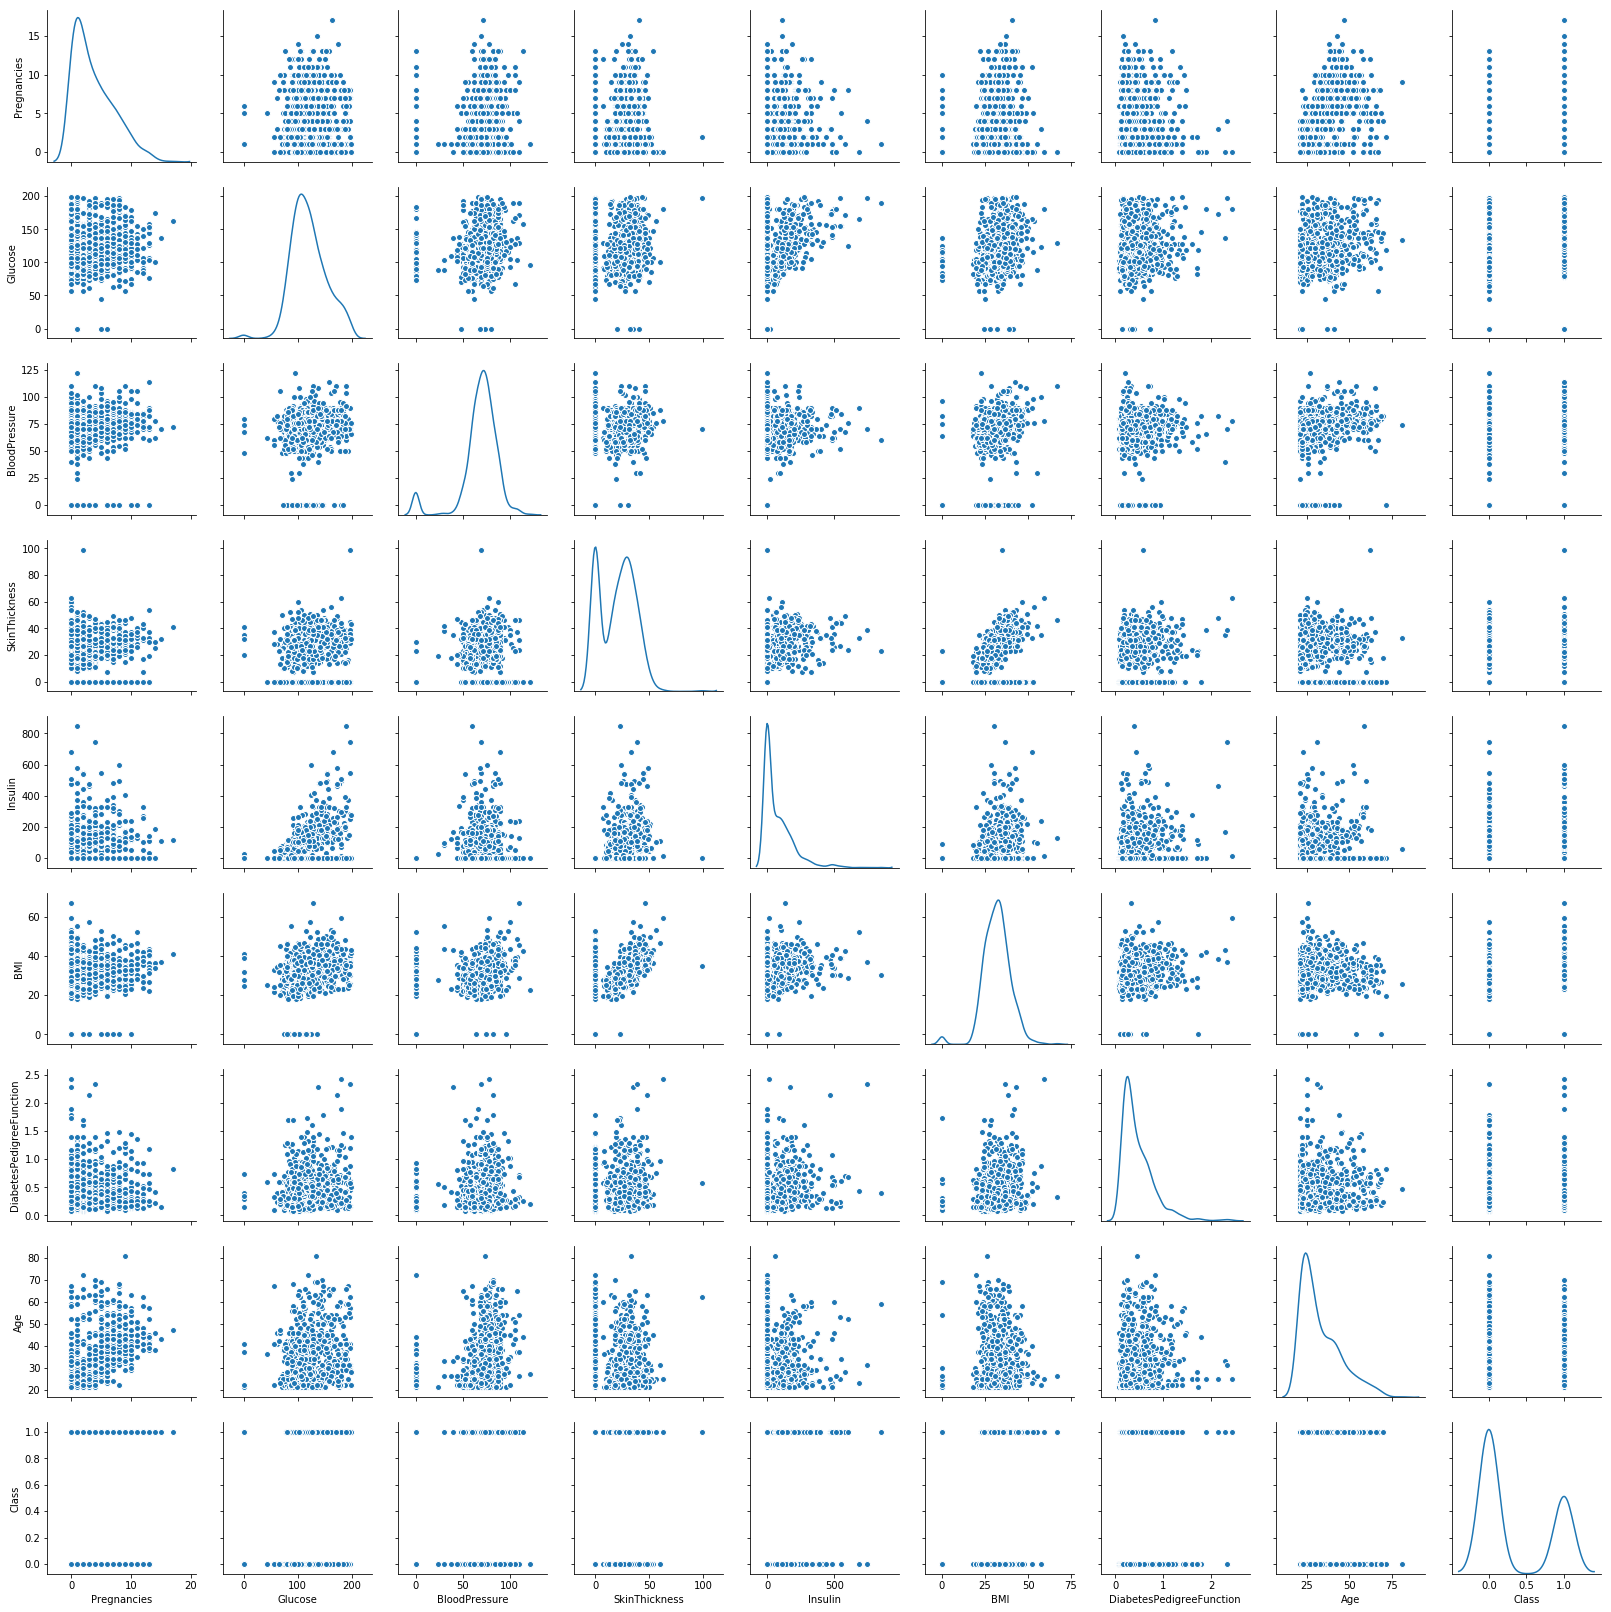

In [389]:
sns.pairplot(df_pima, diag_kind='kde')

Overall we can say the data is normalized except few attribute. Insuline is having outliers. The skinthickness ia having two gaussian curves so the data must have came from two different procesess. 

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [450]:
from sklearn.model_selection import train_test_split
x=df_pima.iloc[:,0:-1]
y=df_pima['Class']

In [451]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10,stratify=y)

## Q5 Train Support Vector Machine Model(1 Marks)

In [452]:
from sklearn.svm import SVC
clf = SVC()    
clf.fit(X_train,y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.6493506493506493


# your insights
Its an overfit model

## Q6 Scale the data points using MinMaxScaler ( 1 Marks)

In [453]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Q7 Fit SVM Model on Scale data and give your observation( 1 Marks)

In [454]:
clf.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [455]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.752442996742671
0.7727272727272727


In [456]:
y_pred=clf.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
Class,,
0,87,13
1,22,32


#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [457]:
clf = SVC(C=1000)    
clf.fit(X_train,y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7850162866449512
0.7597402597402597


### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [19]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [20]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [21]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [22]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [23]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
gs.best_score_ 

0.77777777777777779